In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import pickle

sys.path.append("../scripts/")

from utils import Utils
from clean_data import DataCleaner
from plot import Plotter
from sklearn.cluster import KMeans

In [52]:
utils = Utils()
plotter = Plotter
cleaner = DataCleaner()
plotter = Plotter()

In [53]:
df = utils.load_data("../data/Week1_challenge_data_source(CSV).csv")

In [54]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [55]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [56]:
cleaned_df = cleaner.remove_whitespace_column(df)
cleaned_df = cleaner.convert_to_string(cleaned_df)
cleaned_df = cleaner.convert_to_datetime(cleaned_df)
cleaned_df = cleaner.fill_missing_values_numeric(cleaned_df, "mean")

In [57]:
cleaned_df.rename(columns={'msisdn/number': 'msisdn'}, inplace=True)

In [58]:
cleaned_df[['msisdn','handset_type']] = cleaned_df[['msisdn','handset_type' ]].astype(str)


Extract required columns

In [59]:
user_experience_df = cleaned_df[['msisdn', 'handset_type','avg_rtt_dl_(ms)','avg_rtt_ul_(ms)','avg_bearer_tp_dl_(kbps)','avg_bearer_tp_ul_(kbps)','tcp_dl_retrans._vol_(bytes)','tcp_ul_retrans._vol_(bytes)']]
user_experience_df.head()

,msisdn,handset_type,avg_rtt_dl_(ms),avg_rtt_ul_(ms),avg_bearer_tp_dl_(kbps),avg_bearer_tp_ul_(kbps),tcp_dl_retrans._vol_(bytes),tcp_ul_retrans._vol_(bytes)
0,33664962239.0,Samsung Galaxy A5 Sm-A520F,42.000000,5.000000,23.0,44.0,2.080991e+07,759658.664811
1,33681854413.0,Samsung Galaxy J5 (Sm-J530),65.000000,5.000000,16.0,26.0,2.080991e+07,759658.664811
2,33760627129.0,Samsung Galaxy A8 (2018),109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811
3,33750343200.0,undefined,109.795706,17.662883,44.0,44.0,2.080991e+07,759658.664811
4,33699795932.0,Samsung Sm-G390F,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811


In [60]:
user_experience_df.isnull().sum()

msisdn                         0
handset_type                   0
avg_rtt_dl_(ms)                0
avg_rtt_ul_(ms)                0
avg_bearer_tp_dl_(kbps)        0
avg_bearer_tp_ul_(kbps)        0
tcp_dl_retrans._vol_(bytes)    0
tcp_ul_retrans._vol_(bytes)    0
dtype: int64

### Task 3.1 - Aggregate per customer, the following information(treat missing and outliers )
* Average TCP retransmission
* Average RTT
* Handset type
* Average throughput

Aggregat ul and dl columns together

In [61]:
user_experience_metrics_df = pd.DataFrame(columns=['msisdn', 'handset_type', 'avg_rtt_(ms)', 'avg_bearer_tp_(kbps)', 'tcp_retrans._vol_(bytes)'])

user_experience_metrics_df['avg_rtt_(ms)'] = user_experience_df['avg_rtt_dl_(ms)'] + user_experience_df['avg_rtt_ul_(ms)']
user_experience_metrics_df['avg_bearer_tp_(kbps)'] = user_experience_df['avg_bearer_tp_dl_(kbps)'] + user_experience_df['avg_bearer_tp_ul_(kbps)']
user_experience_metrics_df['tcp_retrans._vol_(bytes)'] = user_experience_df['tcp_dl_retrans._vol_(bytes)'] + user_experience_df['tcp_ul_retrans._vol_(bytes)']

user_experience_metrics_df['msisdn'] = user_experience_df['msisdn']
user_experience_metrics_df['handset_type'] = user_experience_df['handset_type']
user_experience_metrics_df_2 = user_experience_metrics_df.copy()
user_experience_metrics_df.head()


,msisdn,handset_type,avg_rtt_(ms),avg_bearer_tp_(kbps),tcp_retrans._vol_(bytes)
0,33664962239.0,Samsung Galaxy A5 Sm-A520F,47.000000,67.0,2.156957e+07
1,33681854413.0,Samsung Galaxy J5 (Sm-J530),70.000000,42.0,2.156957e+07
2,33760627129.0,Samsung Galaxy A8 (2018),127.458589,15.0,2.156957e+07
3,33750343200.0,undefined,127.458589,88.0,2.156957e+07
4,33699795932.0,Samsung Sm-G390F,127.458589,15.0,2.156957e+07


Aggregate by customer

In [62]:
experience_by_customer = user_experience_metrics_df.groupby(['msisdn']).agg({'avg_rtt_(ms)': 'sum', 'avg_bearer_tp_(kbps)': 'sum', 'tcp_retrans._vol_(bytes)': 'sum'})
experience_by_customer.head()

,avg_rtt_(ms),avg_bearer_tp_(kbps),tcp_retrans._vol_(bytes)
msisdn,,,
3197020876596.0,127.458589,1.0,2.156957e+07
33601001722.0,46.000000,76.0,2.156957e+07
33601001754.0,31.000000,99.0,2.156957e+07
33601002511.0,127.458589,97.0,2.156957e+07
33601007832.0,84.000000,248.0,7.607247e+05


Handle outliers

In [63]:
experience_by_customer = cleaner.handle_outliers(experience_by_customer, 'avg_rtt_(ms)', 'mean')
experience_by_customer = cleaner.handle_outliers(experience_by_customer, 'avg_bearer_tp_(kbps)', 'mean')
experience_by_customer = cleaner.handle_outliers(experience_by_customer, 'tcp_retrans._vol_(bytes)', 'mean')

experience_by_customer.head()


,avg_rtt_(ms),avg_bearer_tp_(kbps),tcp_retrans._vol_(bytes)
msisdn,,,
3197020876596.0,127.458589,1.0,2.156957e+07
33601001722.0,46.000000,76.0,2.156957e+07
33601001754.0,31.000000,99.0,2.156957e+07
33601002511.0,127.458589,97.0,2.156957e+07
33601007832.0,84.000000,248.0,7.607247e+05


In [64]:
experience_by_customer.describe()

,avg_rtt_(ms),avg_bearer_tp_(kbps),tcp_retrans._vol_(bytes)
count,106857.000000,106857.000000,1.068570e+05
mean,114.074406,15477.989748,1.958933e+07
std,80.393118,23172.704498,1.316351e+07
min,0.000000,0.000000,9.700000e+01
25%,47.000000,97.000000,7.075490e+06
50%,94.000000,301.000000,2.156957e+07
75%,140.000000,26508.000000,2.158171e+07
max,279.500000,66124.500000,4.334104e+07


### Task 3.2 - List 10 of top, bottom and most frequent
* TCP Values
* RTT values
* Throughput values

In [65]:
tcp = experience_by_customer.sort_values(by=['tcp_retrans._vol_(bytes)'], ascending=False)

top_10_tcp = tcp.head(10)
bottom_10_tcp = tcp.tail(10)
most_freq_tcp = tcp['tcp_retrans._vol_(bytes)'].value_counts().head(10)

In [66]:
print("Top 10 TCP Retransmissions:")
display(top_10_tcp['tcp_retrans._vol_(bytes)'])
print("Bottom 10 TCP Retransmissions:")
display(bottom_10_tcp['tcp_retrans._vol_(bytes)'])
print("Most Frequent TCP Retransmissions:")
display(most_freq_tcp)

Top 10 TCP Retransmissions:


msisdn
nan              4.334104e+07
33665337590.0    4.334104e+07
33750491291.0    4.334104e+07
33629590691.0    4.334104e+07
33629595819.0    4.334104e+07
33665341309.0    4.334104e+07
33661495631.0    4.334104e+07
33665341355.0    4.334104e+07
33665341575.0    4.334104e+07
33665342273.0    4.334104e+07
Name: tcp_retrans._vol_(bytes), dtype: float64

Bottom 10 TCP Retransmissions:


msisdn
33699694715.0    182.0
33679366089.0    179.0
33784203839.0    177.0
33650681239.0    176.0
33769636458.0    176.0
33607833304.0    143.0
33626357513.0    134.0
33762062356.0    129.0
33614777138.0    128.0
33650128412.0     97.0
Name: tcp_retrans._vol_(bytes), dtype: float64

Most Frequent TCP Retransmissions:


2.156957e+07    47125
4.313915e+07     7468
4.334104e+07     6771
2.081121e+07      363
2.081124e+07      167
7.609887e+05      145
4.238078e+07       82
2.081123e+07       81
7.597507e+05       78
7.623187e+05       78
Name: tcp_retrans._vol_(bytes), dtype: int64

In [67]:
rtt = experience_by_customer.sort_values(by=['avg_rtt_(ms)'], ascending=False)

top_10_rtt = tcp.head(10)
bottom_10_rtt = tcp.tail(10)
most_freq_rtt = tcp['avg_rtt_(ms)'].value_counts().head(10)

In [68]:
print("Top 10 RTT values:")
display(top_10_rtt['avg_rtt_(ms)'])
print("Bottom 10 RTT values:")
display(bottom_10_rtt['avg_rtt_(ms)'])
print("Most Frequent RTT values:")
display(most_freq_rtt)

Top 10 RTT values:


msisdn
nan              279.500000
33665337590.0    279.500000
33750491291.0     67.000000
33629590691.0    215.458589
33629595819.0    279.500000
33665341309.0    135.000000
33661495631.0    146.000000
33665341355.0    113.000000
33665341575.0    228.000000
33665342273.0    124.000000
Name: avg_rtt_(ms), dtype: float64

Bottom 10 RTT values:


msisdn
33699694715.0    169.0
33679366089.0     39.0
33784203839.0     74.0
33650681239.0     52.0
33769636458.0     32.0
33607833304.0     32.0
33626357513.0     40.0
33762062356.0     41.0
33614777138.0     64.0
33650128412.0     48.0
Name: avg_rtt_(ms), dtype: float64

Most Frequent RTT values:


127.458589    16353
279.500000    11069
29.000000      2736
39.000000      2162
254.917178     1908
38.000000      1446
30.000000      1419
40.000000      1383
28.000000      1330
49.000000      1194
Name: avg_rtt_(ms), dtype: int64

In [69]:
tp = experience_by_customer.sort_values(by=['avg_bearer_tp_(kbps)'], ascending=False)

top_10_tp = tcp.head(10)
bottom_10_tp = tcp.tail(10)
most_freq_tp = tcp['avg_bearer_tp_(kbps)'].value_counts().head(10)


In [70]:
print("Top 10 TP values:")
display(top_10_tp['avg_bearer_tp_(kbps)'])
print("Bottom 10 TP values:")
display(bottom_10_tp['avg_bearer_tp_(kbps)'])
print("Most Frequent TP values:")
display(most_freq_tp)

Top 10 TP values:


msisdn
nan              66124.5
33665337590.0    66124.5
33750491291.0     6864.0
33629590691.0     6498.0
33629595819.0    25622.0
33665341309.0    40513.0
33661495631.0      265.0
33665341355.0    66124.5
33665341575.0    65067.0
33665342273.0    52499.0
Name: avg_bearer_tp_(kbps), dtype: float64

Bottom 10 TP values:


msisdn
33699694715.0      169.0
33679366089.0    35068.0
33784203839.0     5897.0
33650681239.0     7039.0
33769636458.0    12210.0
33607833304.0    16853.0
33626357513.0    10964.0
33762062356.0    32577.0
33614777138.0     8654.0
33650128412.0    30581.0
Name: avg_bearer_tp_(kbps), dtype: float64

Most Frequent TP values:


66124.5    10621
15.0        2685
63.0        2072
97.0        1023
90.0        1005
98.0         971
96.0         866
99.0         853
89.0         817
95.0         798
Name: avg_bearer_tp_(kbps), dtype: int64

### Task 3.3 
* Distribution of the average throughput per handset type and provide interpretation
* Distribution of the average tcp transmission view per handset type 

In [71]:
per_handset = user_experience_metrics_df.groupby('handset_type').agg({'avg_bearer_tp_(kbps)': 'sum', 'tcp_retrans._vol_(bytes)': 'sum'})
per_handset.head()

,avg_bearer_tp_(kbps),tcp_retrans._vol_(bytes)
handset_type,,
A-Link Telecom I. Cubot A5,23510.0,2.156957e+07
A-Link Telecom I. Cubot Note Plus,6699.0,6.162130e+05
A-Link Telecom I. Cubot Note S,8937.0,4.141173e+07
A-Link Telecom I. Cubot Nova,56217.0,1.371700e+05
A-Link Telecom I. Cubot Power,69468.0,8.041000e+03


Check for outliers that might affect the interpretation

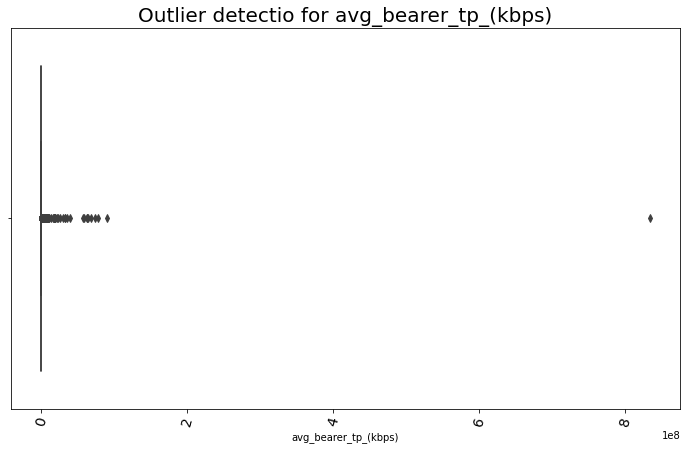

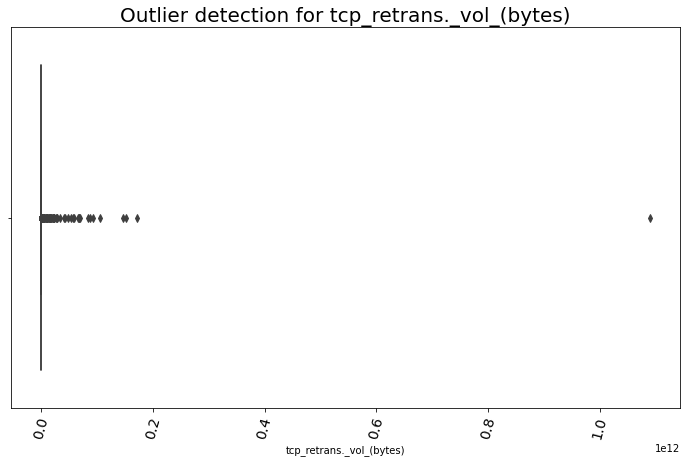

In [72]:
Plotter.plot_box(per_handset, 'avg_bearer_tp_(kbps)', 'Outlier detectio for avg_bearer_tp_(kbps)')
Plotter.plot_box(per_handset, 'tcp_retrans._vol_(bytes)', 'Outlier detection for tcp_retrans._vol_(bytes)')

Both columns show the presence of outliers and should be treated

In [73]:
cleaned_per_handset = cleaner.handle_outliers(per_handset, 'avg_bearer_tp_(kbps)')
cleaned_per_handset = cleaner.handle_outliers(cleaned_per_handset, 'tcp_retrans._vol_(bytes)')

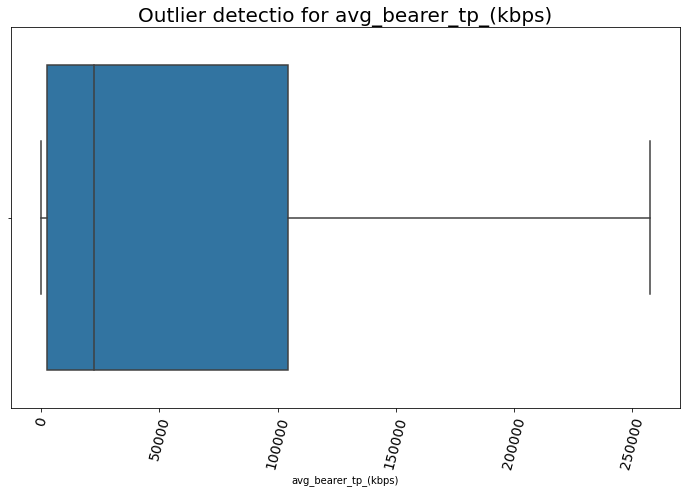

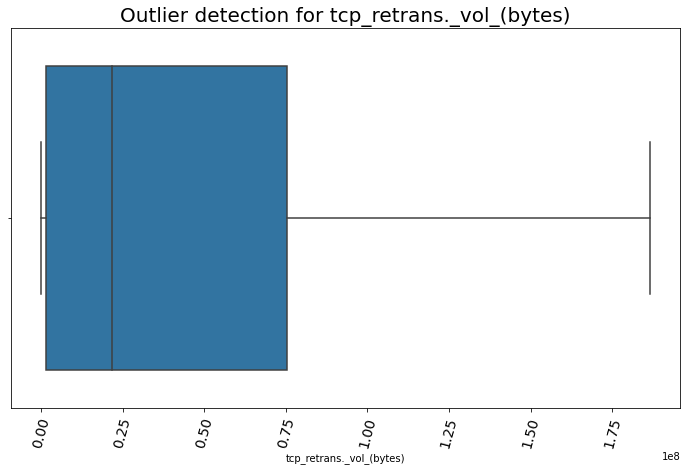

In [74]:
Plotter.plot_box(cleaned_per_handset, 'avg_bearer_tp_(kbps)', 'Outlier detectio for avg_bearer_tp_(kbps)')
Plotter.plot_box(cleaned_per_handset, 'tcp_retrans._vol_(bytes)', 'Outlier detection for tcp_retrans._vol_(bytes)')

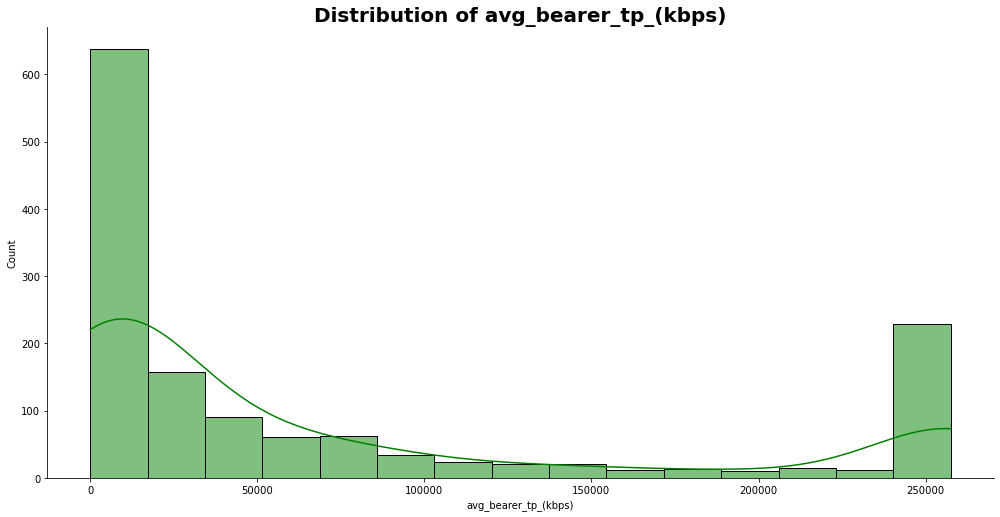

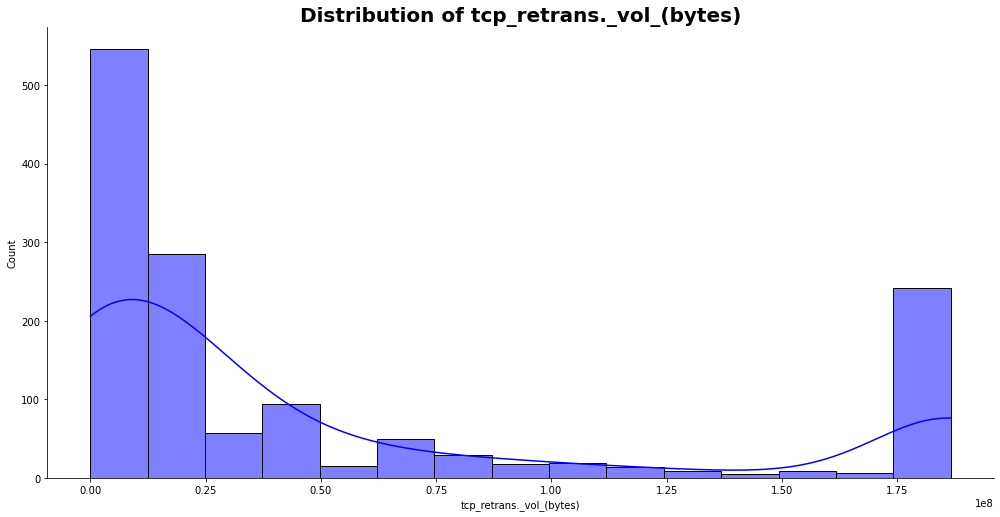

In [75]:
Plotter.plot_hist(cleaned_per_handset, 'avg_bearer_tp_(kbps)','green')
Plotter.plot_hist(cleaned_per_handset, 'tcp_retrans._vol_(bytes)', 'blue')

### Task 3.4 - K-means clustering using the experience metrics

First we need to normalize the experience metrics for the K-means algorithm to work properly

In [76]:
user_experience_metrics_df.head()

,msisdn,handset_type,avg_rtt_(ms),avg_bearer_tp_(kbps),tcp_retrans._vol_(bytes)
0,33664962239.0,Samsung Galaxy A5 Sm-A520F,47.000000,67.0,2.156957e+07
1,33681854413.0,Samsung Galaxy J5 (Sm-J530),70.000000,42.0,2.156957e+07
2,33760627129.0,Samsung Galaxy A8 (2018),127.458589,15.0,2.156957e+07
3,33750343200.0,undefined,127.458589,88.0,2.156957e+07
4,33699795932.0,Samsung Sm-G390F,127.458589,15.0,2.156957e+07


In [77]:
normalized_user_experience_metrics_df = cleaner.normalizer(user_experience_metrics_df)

In [78]:
kmeans= KMeans(
    init="k-means++",
    n_clusters= 3,
    n_init= 10,
    max_iter= 300,
    random_state=20  
)

In [79]:
model = kmeans.fit(normalized_user_experience_metrics_df)

In [80]:
user_experience_metrics_df.iloc[:,2:]

,avg_rtt_(ms),avg_bearer_tp_(kbps),tcp_retrans._vol_(bytes)
0,47.000000,67.000000,2.156957e+07
1,70.000000,42.000000,2.156957e+07
2,127.458589,15.000000,2.156957e+07
3,127.458589,88.000000,2.156957e+07
4,127.458589,15.000000,2.156957e+07
...,...,...,...
149996,32.000000,117.000000,2.156957e+07
149997,29.000000,77.000000,2.156957e+07
149998,49.000000,90.000000,2.156957e+07
149999,42.000000,71.000000,2.156957e+07


In [81]:
clustered_experience = user_experience_metrics_df.copy()
clustered_experience['cluster'] = model.predict(normalized_user_experience_metrics_df)
clustered_experience.head()


,msisdn,handset_type,avg_rtt_(ms),avg_bearer_tp_(kbps),tcp_retrans._vol_(bytes),cluster
0,33664962239.0,Samsung Galaxy A5 Sm-A520F,47.000000,67.0,2.156957e+07,0
1,33681854413.0,Samsung Galaxy J5 (Sm-J530),70.000000,42.0,2.156957e+07,0
2,33760627129.0,Samsung Galaxy A8 (2018),127.458589,15.0,2.156957e+07,0
3,33750343200.0,undefined,127.458589,88.0,2.156957e+07,0
4,33699795932.0,Samsung Sm-G390F,127.458589,15.0,2.156957e+07,0


In [82]:
clustered_experience.groupby('cluster').agg(['min','max','mean','count','var','std'])

avg_rtt_(ms)                                                          \
                 min      max        mean   count            var         std   
cluster                                                                        
0                0.0  96924.0  130.980273  140831  338077.322501  581.444170   
1               19.0   3125.0   61.416667    3828    4890.435959   69.931652   
2               20.0  11238.0   81.941221    5342   46552.138465  215.759446   

        avg_bearer_tp_(kbps)                                                \
                         min       max          mean   count           var   
cluster                                                                      
0                        0.0  304299.0  13394.512369  140831  6.473569e+08   
1                      251.0  313244.0  42798.342215    3828  1.114108e+09   
2                      129.0  382262.0  39384.431112    5342  1.126291e+09   

                      tcp_retrans._vol_(bytes)                              \
                  std                      min           max          mean   
cluster                                                                      
0        25443.208353                   1027.0  4.344116e+09  2.297034e+07   
1        33378.257189                     86.0  1.916130e+05  1.538086e+04   
2        33560.257068                    182.0  1.284627e+06  8.665480e+04   

                                             
          count           var           std  
cluster                                      
0        140831  1.490916e+16  1.221031e+08  
1          3828  3.071037e+08  1.752438e+04  
2          5342  8.217212e+09  9.064884e+04

#### Cluster 0
* This cluster of users have the worst experience as compared to the other cluster. They have the highest RTT and TCP retransmission on average which indicates that there is less throughput. This can be confirmed by comparing the mean values. This cluster also contains the highest number of users. 



#### Cluster 1
* Users in cluster 1 have the best experience. They have less delay(smaller RTT) and also less tcp retransmission which indicates that the majority of the traffic is successfully sent and recieved. This means there is high throughput and this can be confirmed by the mean values. This cluster contains the smallest number of users.


#### Cluster 2
* Users in cluster 2 have an intermediate experience. They have an experience which is closer to cluster 1 meaning they have an experience that is slightly worse than cluster 1.


Export data for user satisfaction analysis

In [84]:
distance = kmeans.fit_transform(normalized_user_experience_metrics_df)

distance_from_less_exp = list(map(lambda x : x[0], distance))

experience_metrics_with_cluster = user_experience_metrics_df_2.copy()
experience_metrics_with_cluster['score'] = distance_from_less_exp

In [85]:
experience_metrics_with_cluster.head()

,msisdn,handset_type,avg_rtt_(ms),avg_bearer_tp_(kbps),tcp_retrans._vol_(bytes),score
0,33664962239.0,Samsung Galaxy A5 Sm-A520F,47.000000,67.0,2.156957e+07,0.012566
1,33681854413.0,Samsung Galaxy J5 (Sm-J530),70.000000,42.0,2.156957e+07,0.012568
2,33760627129.0,Samsung Galaxy A8 (2018),127.458589,15.0,2.156957e+07,0.012569
3,33750343200.0,undefined,127.458589,88.0,2.156957e+07,0.012565
4,33699795932.0,Samsung Sm-G390F,127.458589,15.0,2.156957e+07,0.012569


In [86]:
utils.save_data(experience_metrics_with_cluster,'../data/user_experience_metrics.csv')